In [1]:
import data_preprocess as dp
import functions as f
import data_evaluation as l
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from importlib import reload
import pandas as pd
import numpy as np
reload(dp)
reload(f)
reload(l)

<module 'data_evaluation' from 'c:\\Users\\vivek\\Documents\\project\\data_evaluation.py'>

In [16]:
df=dp.get_data()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1728 entries, 2015-01-01 to 2021-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1728 non-null   float64
 1   Low        1728 non-null   float64
 2   Open       1728 non-null   float64
 3   Close      1728 non-null   float64
 4   Volume     1728 non-null   float64
 5   Adj Close  1728 non-null   float64
 6   x0         1728 non-null   float64
dtypes: float64(7)
memory usage: 108.0 KB


,High,Low,Open,Close,Volume,Adj Close,x0
Date,,,,,,,
2015-01-01,441.812073,437.676270,438.988831,439.781311,1367720.0,419.247406,1.0
2015-01-02,443.818054,437.998199,439.880371,438.617340,3383424.0,418.137726,1.0
2015-01-05,441.267212,432.946106,438.344940,433.812897,4662967.0,413.557648,1.0
2015-01-06,432.401276,412.093750,430.915344,414.124512,8596809.0,394.788513,1.0
2015-01-07,425.367950,414.570282,414.619812,423.139069,9562421.0,403.382172,1.0


In [17]:
df=dp.drop_data(df)
df.head()

,Open,Close,x0
Date,,,
2015-01-01,438.988831,439.781311,1.0
2015-01-02,439.880371,438.617340,1.0
2015-01-05,438.344940,433.812897,1.0
2015-01-06,430.915344,414.124512,1.0
2015-01-07,414.619812,423.139069,1.0


<AxesSubplot:xlabel='Date'>

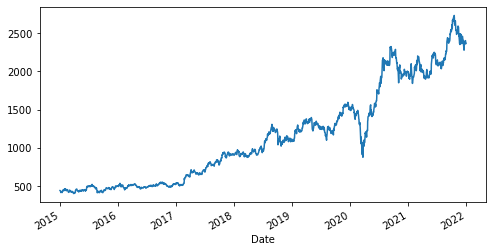

In [18]:
df["Close"].plot(figsize=(8,4))

<AxesSubplot:xlabel='Date'>

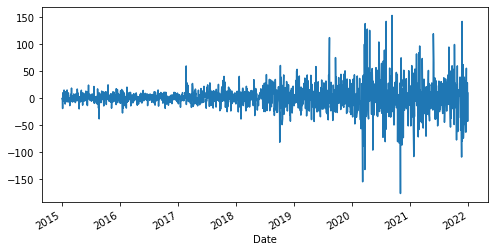

In [19]:
df["Close"].diff().plot(figsize=(8,4))

<AxesSubplot:xlabel='Date'>

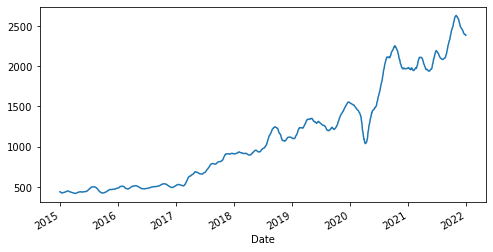

In [20]:
df["Close"].rolling(window='30D').mean().plot(figsize=(8,4))


<AxesSubplot:xlabel='Date'>

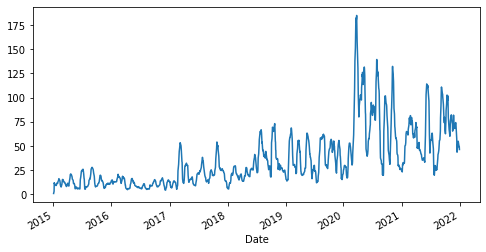

In [21]:
df["Close"].rolling(window='30D').std().plot(figsize=(8,4))

In [22]:
# min_close=df["Close"].min()
# max_close=df["Close"].max()
# min_open=df["Open"].min()
# max_open=df["Open"].max()

In [23]:
#normalize
df=dp.min_max(df)
df.head()

,Open,Close,x0
Date,,,
2015-01-01,0.014764,0.016398,1.0
2015-01-02,0.015145,0.015899,1.0
2015-01-05,0.014489,0.013837,1.0
2015-01-06,0.011311,0.005388,1.0
2015-01-07,0.004342,0.009257,1.0


In [24]:
x1,x2,y1,y2=train_test_split(df.loc[:,["Open","x0"]],df["Close"],test_size=0.01,shuffle=False)
w=f.logistic_regression(x1,y1,0.01,100)
print(w)
pred_y=f.sigmoid(np.dot(x2,w))
d2=pd.DataFrame(y2)
d2["pred"]=pred_y
d2.head()

[ 5.28775607 -2.6973284 ]


,Close,pred
Date,,
2021-12-08,0.865360,0.866440
2021-12-09,0.881817,0.869266
2021-12-10,0.882890,0.870610
2021-12-13,0.861733,0.878846
2021-12-14,0.849074,0.854471


In [25]:
loss=f.loss(y2,pred_y)
loss

7.634258788725158

In [26]:
# d2=dp.denormalize(d2,max_close,min_close)
# pred_y=dp.denormalize(pred_y,max_close,min_close)
# x2=dp.denormalize(x2,max_open,min_open)
# y2=dp.denormalize(y2,max_close,min_close)
# d2.head()

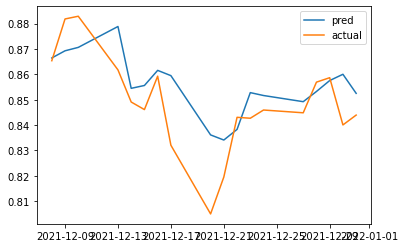

In [27]:
plt.plot(d2["pred"],label="pred")
plt.plot(d2["Close"],label="actual")
plt.legend()
plt.show()

In [28]:
l.evaluate_simple(x2,y2,pred_y)

accuracy of our model:  29.493236438808516 %
-------------------------
profit our model expect:  0.16339853211029332
profit we actually made:  0.05019023925025279
maximum profit that is possible:  0.17017542091179327
percentage of profit we made:  30.71645663032921 %
profit that we can make if we always buy:  0.02847006626122639
profit that we can make if we always sell:  -0.02847006626122639
confusion matrix:  [[ 1  4]
 [ 1 12]]
